In [2]:
import pandas as pd
import numpy as np
import random
from scipy import stats

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import scipy.stats as st

In [5]:
bp = pd.read_csv('bp.csv')
paired = pd.read_csv('paired.csv')

In [6]:
bp.head()

,bp,type
0,68,No
1,70,Yes
2,82,No
3,76,No
4,60,No


<AxesSubplot:ylabel='Frequency'>

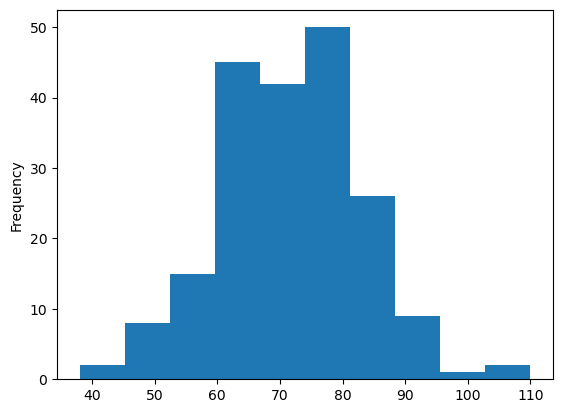

In [7]:
bp['bp'].plot(kind='hist')

### Mean

In [94]:
pd.pivot_table(bp,index=['type'],values='bp',aggfunc='mean')

,bp
type,
No,69.545455
Yes,74.588235


Mean of Diabetic bp = 75
Mean of Non-Diabetic bp = 70


Diabetic has the highest mean 

### Median

In [95]:
pd.pivot_table(bp,index=['type'],values='bp',aggfunc='median')

,bp
type,
No,70
Yes,76


Median of Diabetic bp = 76
Median of Non-Diabetic bp = 70


Diabetic has the highest median 

### Using the BP.CSV dataset

In [96]:
bp.shape

(200, 2)

#### Splitting the dataset into Diabetic and Non Diabetic

In [8]:
bp_yes = bp.query("type == 'Yes'")

In [9]:
bp_yes.shape

(68, 2)

In [10]:
bp_no = bp.query("type == 'No'")

In [11]:
bp_no.shape

(132, 2)

In [12]:
from scipy.stats import ttest_rel

In [13]:

t_value, p_value = stats.ttest_ind(bp_yes['bp'],bp_no['bp'])
 
print('Test statistic is %f' % float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f' % p_value)
 
alpha = 0.05
if p_value <= alpha:
 
    print('Conclusion', 'Since p-value(=%f)' % p_value,
          '<', 'alpha(=%.2f)' % alpha,
          '''We reject the null hypothesis H0. μ1 = μ2 at %.2f level of significance.''' % alpha)
 
else:
 
    print('Conclusion', 'n', 'Since p-value(=%f)' % p_value,
          '>', 'alpha(=%.2f)' % alpha,
          'We fail to reject the null \
          hypothesis H0.')

Test statistic is 3.001495
p-value for two tailed test is 0.003032
Conclusion Since p-value(=0.003032) < alpha(=0.05) We reject the null hypothesis H0. μ1 = μ2 at 0.05 level of significance.


The p-value is less than the significance level, hence, the test says there is enough evidence to reject the null hypothesis and that the samples were likely drawn from populations with differing distributions.

### Using Wilconxon Test

Reducing the Diabetic data to match with Non Diabetic to be able to use the Wilcoxon test

In [14]:
import random
d1 = np.random.choice(bp_no['bp'], size=68, replace=False)

In [15]:
stat, p = stats.wilcoxon(bp_yes['bp'],d1)
print('stat=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
 print('Same distribution (fail to reject H0)')
else:
 print('Different distribution (reject H0)')

stat=545.000, p=0.002
Different distribution (reject H0)


The results of the two tests are both less than 0.05 (0.003032 & 0.012), both tests suggests that there is enough evidence to reject the null hypothesis and that the samples were likely drawn from populations with differing distributions.

### Using the paired Dataset

In [16]:
paired.head()

,Clone,August,November
0,Balsam_Spire,8.1,11.2
1,Beaupre,10.0,16.3
2,Hazendans,16.5,15.3
3,Hoogvorst,13.6,15.6
4,Raspalje,9.5,10.5


In [17]:
paired.describe()

,August,November
count,13.000000,13.000000
mean,11.423077,16.323077
std,3.451607,6.886963
min,7.900000,10.500000
25%,8.300000,12.700000
50%,10.000000,15.300000
75%,13.400000,16.300000
max,18.300000,36.800000


#### The Month of November has the highest mean and median values with (16.3 mean & 15.3 median)

#### Using Paired t test on the Paired Data

In [30]:

t_value, p_value = stats.ttest_ind(paired['August'],paired['November'])
 
print('Test statistic is %f' % float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f' % p_value)
 
alpha = 0.05
if p_value <= alpha:
 
    print('Conclusion', 'Since p-value(=%f)' % p_value,
          '<', 'alpha(=%.2f)' % alpha,
          '''We reject the null hypothesis H0. μ1 = μ2 at %.2f level of significance.''' % alpha)
 
else:
 
    print('Conclusion', 'n', 'Since p-value(=%f)' % p_value,
          '>', 'alpha(=%.2f)' % alpha,
          'We fail to reject the null \
          hypothesis H0.')

Test statistic is -2.293401
p-value for two tailed test is 0.030884
Conclusion Since p-value(=0.030884) < alpha(=0.05) We reject the null hypothesis H0. μ1 = μ2 at 0.05 level of significance.


In [19]:
paired.shape

(13, 3)

In [20]:
stat, p = stats.wilcoxon(paired['August'],paired['November'])
print('stat=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
 print('Same distribution (fail to reject H0)')
else:
 print('Different distribution (reject H0)')

stat=16.000, p=0.040
Different distribution (reject H0)


In [22]:
bp_no.head()

,bp,type
0,68,No
2,82,No
3,76,No
4,60,No
6,58,No


In [23]:
bp_yes.head()

,bp,type
1,70,Yes
5,76,Yes
9,78,Yes
10,40,Yes
12,60,Yes


In [24]:
bp1 = (bp_no['bp'],)

### Confidence Interval for the BP.CSV dataset 

In [25]:
#Using NO Diabetic Data
bootstrap_ci = stats.bootstrap(bp1, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')

#IC 95% 
print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=67.6590909090909, high=71.47727272727273)


There is a 95% chance that the confidence interval of [67.59, 71.47] contains the true population mean of patients with No Diabetes.

In [26]:
bp2 = (bp_yes['bp'],)

In [28]:
#Using Diabetic Data
bootstrap_ci = stats.bootstrap(bp2, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')

#IC 95% 
print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=71.77941176470588, high=77.29411764705883)


There is a 95% chance that the confidence interval of [71.77, 77.29] contains the true population mean of patients with Diabetes.

### Calculation using Cohen D

In [29]:
from math import sqrt
 
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = np.mean(d1), np.mean(d2)
	# calculate the effect size
	return (u1 - u2) / s
 
# seed random number generator
np.random.seed(1)

# prepare data
data1 = bp_yes['bp']
data2 = bp_no['bp']

# calculate cohen's d
d = cohend(data1, data2)
print('Cohens d: %.3f' % d)

Cohens d: 0.448
